In this notebook, I will compare several binary classification models using a simulated dataset.

The data is simulated using scikit-learn's ```make_classification```. First, the models will be trained and tested on a simple dataset with 2 relevant features. Later, they will be trained and tested on a more complex dataset with both redundant and repeated features without any feature engineering. ```make_classification``` documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

I will try the following scikit-learn classifiers (click on the model name for documentation): [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html),
[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html),
[LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html),
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html),
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

I will also add multiplayer perceptrons in Keras and PyTorch and evaluate their performances.

Let's create a dataframe to store accuracies of the classifier for comparison later.

In [1]:
import pandas as pd

accuracy_df = pd.DataFrame(columns = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4'])

In [2]:
# create simulated data with 2 features
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples = 1000,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           random_state = 47)

In [3]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 47)

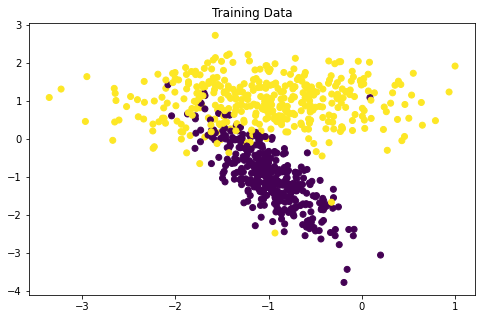

In [4]:
# plot the training data
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [5]:
# import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [6]:
# fit logistic regression with default parameters
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
# obtain prediction accuracy on test data 
score = log_reg.score(X_test, Y_test)
accuracy_df.loc['Logistic Regression', 'Dataset 1'] = score
print(f'Logistirc Regression: {score}')

# fit the decision tree classifier with default parameters
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
# obtain prediction accuracy on test data
score = dt_clf.score(X_test, Y_test)
accuracy_df.loc['Decision Tree Classifier', 'Dataset 1'] = score
print(f'Decision Tree Classifier: {score}')

# fit linear SVC with default parameters
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
# obtain prediction accuracy on test data
score = linear_svc.score(X_test, Y_test)
accuracy_df.loc['Linear SVC', 'Dataset 1'] = score
print(f'Linear SVC: {score}')

# fit K-neighbors classifier with default parameters
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, Y_train)
# obtain prediction accuracy on the test data
score = kn_clf.score(X_test, Y_test)
accuracy_df.loc['KNN Classifier', 'Dataset 1'] = score
print(f'KNN Classifier: {score}')

# fit the random forrest classifier with default parameters
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
# obtain prediction accuracy on the test data
score = rf_clf.score(X_test, Y_test)
accuracy_df.loc['Random Forest Classifier', 'Dataset 1'] = score
print(f'Random Forest Classifier: {score}')

# fit the gradient boosting classifier with default parameters
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, Y_train)
# obtain prediction accuracy on the test data
score = gb_clf.score(X_test, Y_test)
accuracy_df.loc['Gradient Boosting Classifier', 'Dataset 1'] = score
print(f'Gradient Boosting Classifier: {score}')

Logistirc Regression: 0.928
Decision Tree Classifier: 0.944
Linear SVC: 0.928
KNN Classifier: 0.952
Random Forest Classifier: 0.944
Gradient Boosting Classifier: 0.952


In [12]:
%%time
# create a binary classification model in Keras
from keras.models import Sequential
from keras.layers import Dense

# three layer model with 2 feature input and sigmoid output
model = Sequential([
    Dense(30, input_shape=(2,), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
# compile the model using binary crossentropy as the loss function and
# binary accuracy as the evaluation metric
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model.fit(X_train, Y_train, epochs = 50)
# evaluate using the test data
results = model.evaluate(X_test, Y_test)
accuracy_df.loc['Keras NN', 'Dataset 1'] = float(f'{results[1]:.3}')
print(results)

Epoch 1/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6351 - binary_accuracy: 0.5267
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5062 - binary_accuracy: 0.8093
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4209 - binary_accuracy: 0.8827
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3486 - binary_accuracy: 0.9053
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2879 - binary_accuracy: 0.9253
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2462 - binary_accuracy: 0.9267
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2241 - binary_accuracy: 0.9307
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2139 - binary_accuracy: 0.9280
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2098 - binary_accuracy: 0.9307
Epoch 10/50
24/24 [==============================] - 0s

In [13]:
# create a binary classification model in PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

class TorchBinaryClassifier(nn.Module):
    def __init__(self):
        super(TorchBinaryClassifier, self).__init__()
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(2, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x
    
net = TorchBinaryClassifier()

In [14]:
# specify loss and optimizer
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters())

In [15]:
# speficy train and test data
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.from_numpy(X_train).float()
Y_train_tensor = torch.from_numpy(Y_train).float().squeeze()

X_test_tensor = torch.from_numpy(X_test).float()
Y_test_tensor = torch.from_numpy(Y_test).float()

trainset = TensorDataset(X_train_tensor, Y_train_tensor)
testset = TensorDataset(X_test_tensor, Y_test_tensor)

train_loader = DataLoader(trainset)
test_loader = DataLoader(testset)

In [16]:
%%time
# train the model
net.train()

for epoch in range(50):
    # zero the running loss for the epch
    running_loss = 0.0
    
    for data, target in train_loader:
        optimizer.zero_grad()
        output = net(data)
        loss = criterion(output, target.view(-1,1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch: {epoch + 1}, training loss: {running_loss/len(train_loader.dataset)}')

Epoch: 1, training loss: 0.2812818255367456
Epoch: 2, training loss: 0.19851197180710975
Epoch: 3, training loss: 0.1898058420334249
Epoch: 4, training loss: 0.18246981573164037
Epoch: 5, training loss: 0.17675948565501798
Epoch: 6, training loss: 0.17188280628628128
Epoch: 7, training loss: 0.16760673541650734
Epoch: 8, training loss: 0.16383183819781577
Epoch: 9, training loss: 0.16103345364858676
Epoch: 10, training loss: 0.158359219314924
Epoch: 11, training loss: 0.15648633453391844
Epoch: 12, training loss: 0.1544948151673546
Epoch: 13, training loss: 0.15294345941679952
Epoch: 14, training loss: 0.15161303991491226
Epoch: 15, training loss: 0.15076246346328132
Epoch: 16, training loss: 0.1499339058884331
Epoch: 17, training loss: 0.1494198963759809
Epoch: 18, training loss: 0.1485160605065844
Epoch: 19, training loss: 0.1486736705540183
Epoch: 20, training loss: 0.14808104607487746
Epoch: 21, training loss: 0.1473949358941611
Epoch: 22, training loss: 0.1466112383290224
Epoch: 2

In [17]:
# evaluate the model
import numpy as np

net.eval()

test_loss = 0.0
correct_predictions = 0

for data, target in test_loader:
    output = net(data)
    loss = criterion(output, target.view(-1,1))
    test_loss += loss.item()
    predicted = np.round(output.detach().numpy().squeeze())
    actual = target.numpy().squeeze()
    if predicted == actual:
        correct_predictions += 1

accuracy = correct_predictions/len(test_loader.dataset)
accuracy_df.loc['PyTorch NN', 'Dataset 1'] = accuracy

print(f'Loss: {test_loss/len(test_loader.dataset)}')
print(f'Accuracy: {accuracy}')

Loss: 0.14022075861997654
Accuracy: 0.956


Let's look at ```accuracy_df```.

In [18]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4
Logistic Regression,0.928,NaN,NaN,NaN
Decision Tree Classifier,0.948,NaN,NaN,NaN
Linear SVC,0.928,NaN,NaN,NaN
KNN Classifier,0.952,NaN,NaN,NaN
Random Forest Classifier,0.948,NaN,NaN,NaN
Gradient Boosting Classifier,0.952,NaN,NaN,NaN
Keras NN,0.948,NaN,NaN,NaN
PyTorch NN,0.956,NaN,NaN,NaN


All models achieved above 90% accuracy. The PyTorch MLP required by far the most lines of code and was the slowest.

Now I will test the same models on a dataset with 4 features, 3 of which are informative, and one is a random linear combination of the others.

In [19]:
X_2, Y_2 = make_classification(n_samples = 1000,
                           n_features = 4,
                           n_informative = 3,
                           n_redundant = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, 
                                                            test_size = 0.25,
                                                            random_state = 47)

<IPython.core.display.Javascript object>


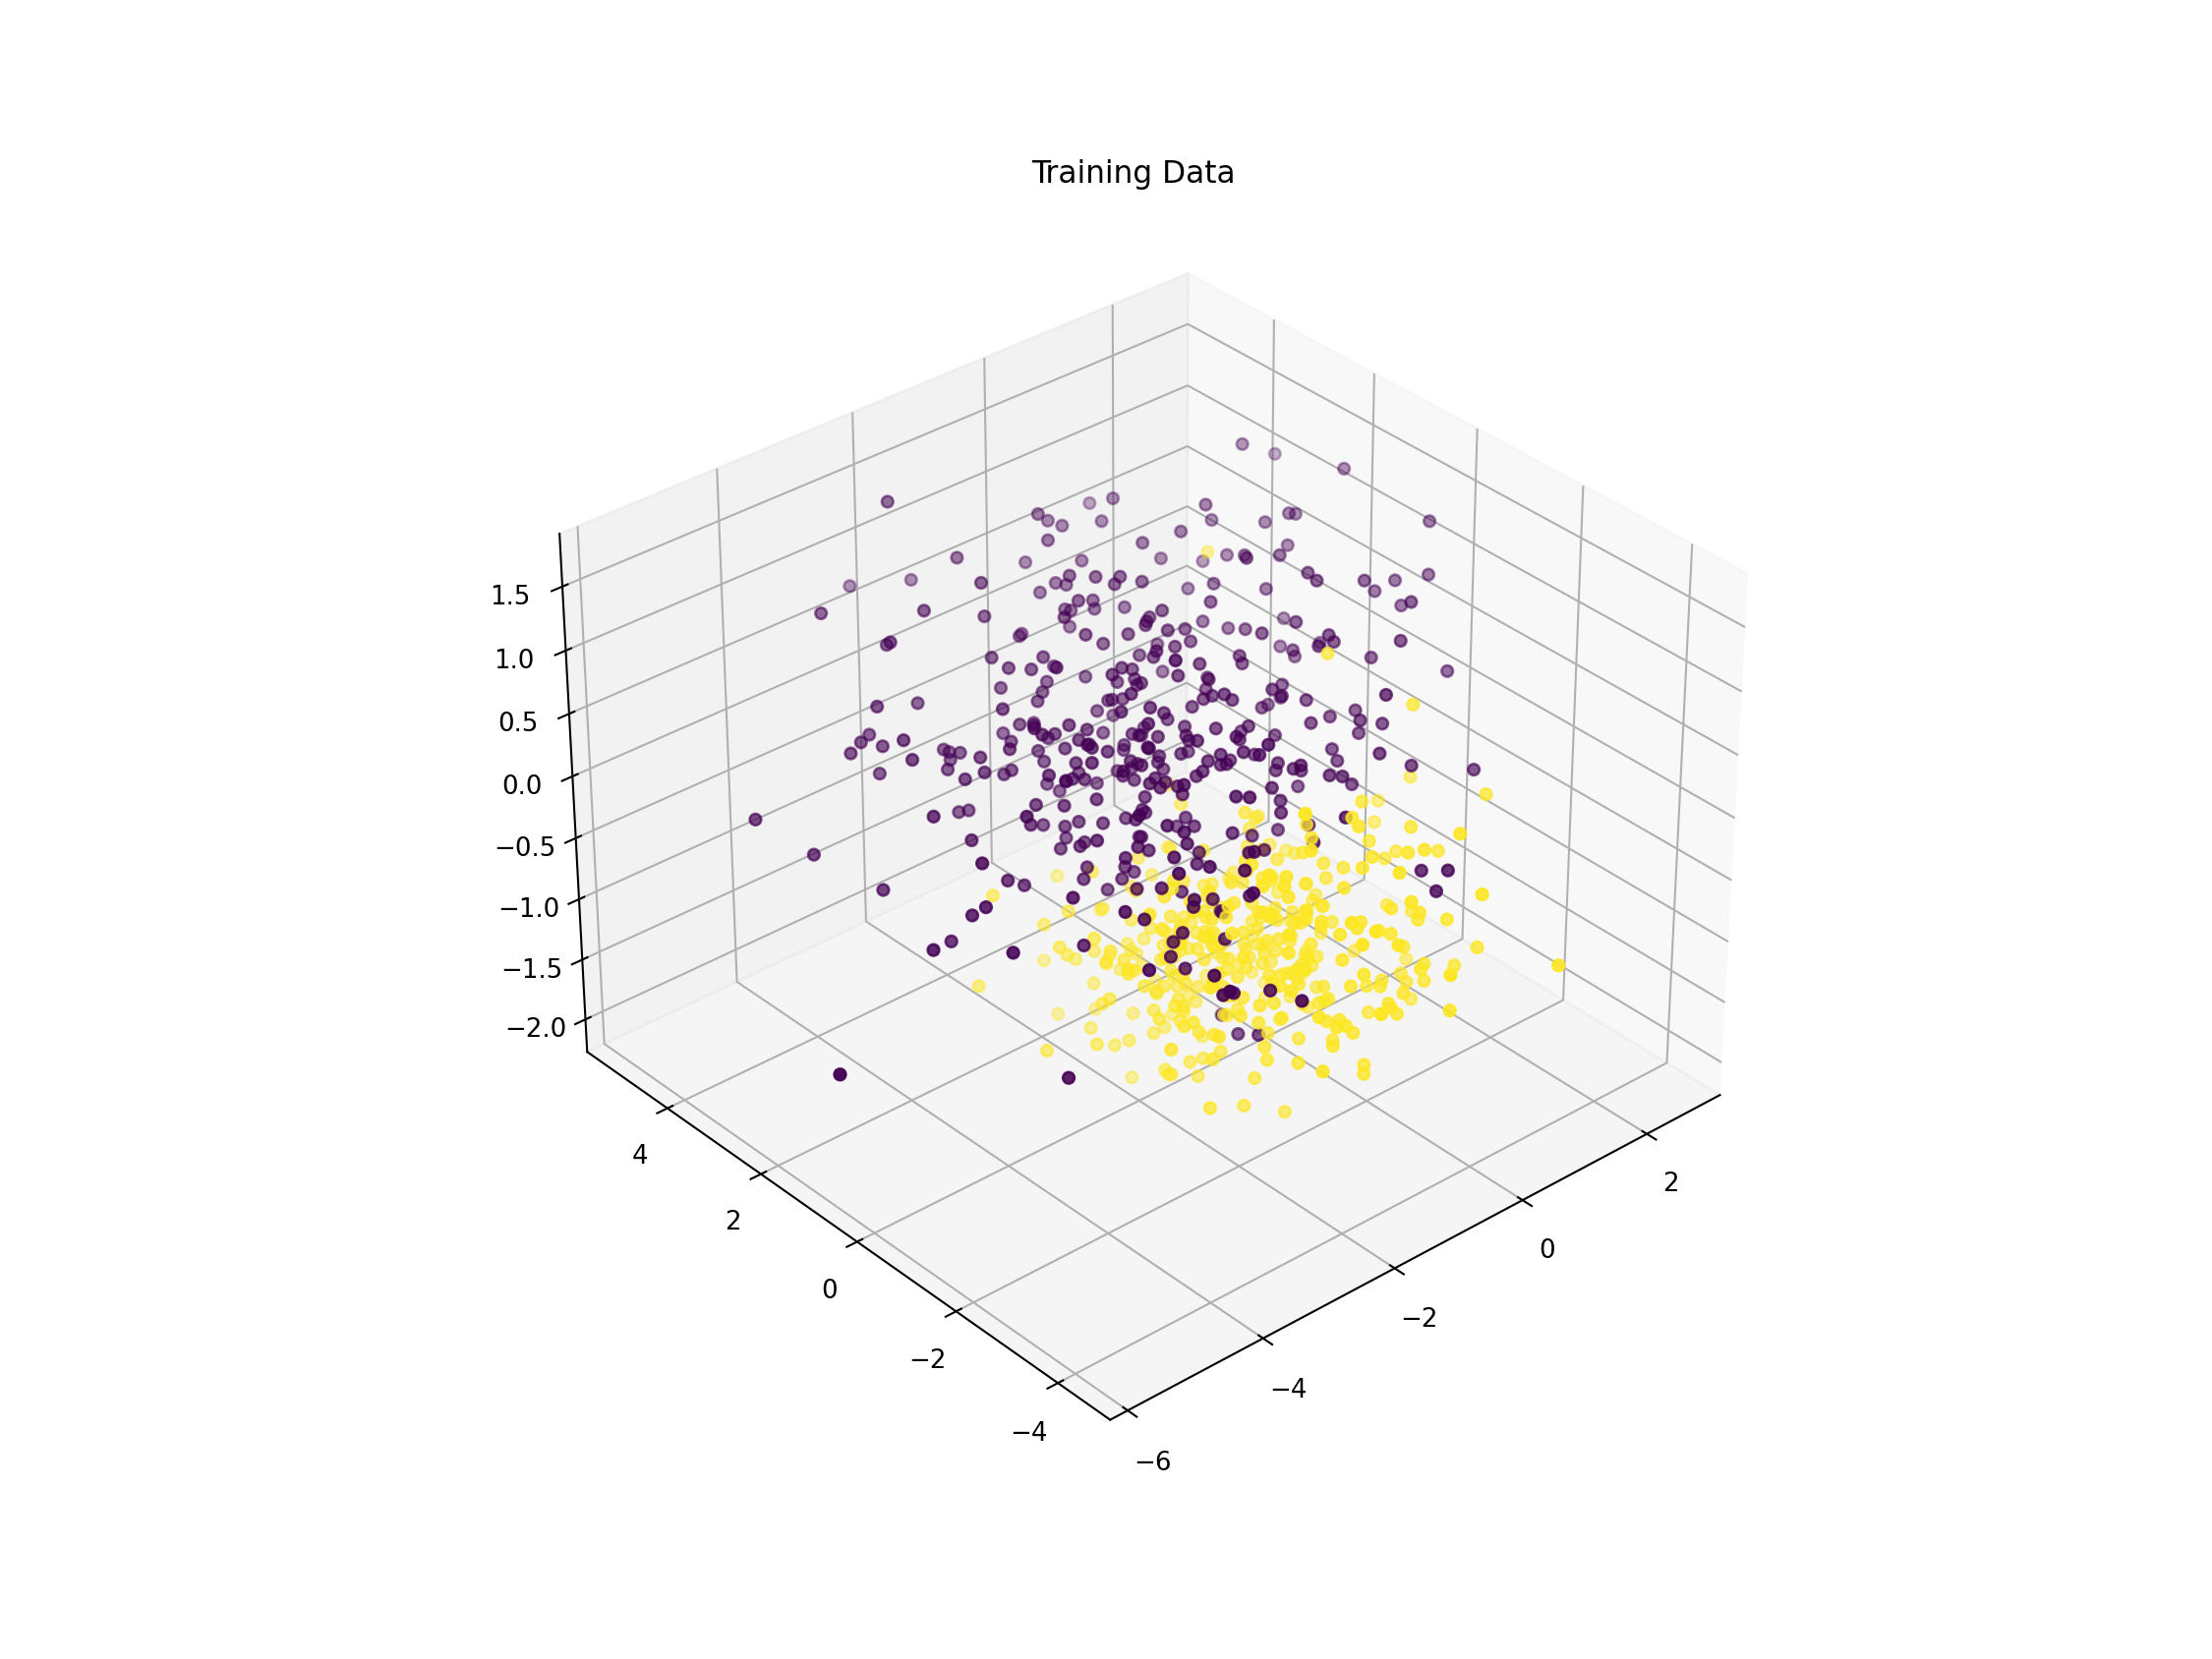

In [20]:
# display the new classes in terms of the first 3 features using an interactive 3d plot
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_2_train[:,0], X_2_train[:,1], X_2_train[:,2], c = Y_2_train)
plt.title('Training Data')
plt.show()

In [21]:
# fit and evaluate logistic regression
log_reg.fit(X_2_train, Y_2_train)
score = log_reg.score(X_2_test, Y_2_test)
accuracy_df.loc['Logistic Regression', 'Dataset 2'] = score
print(score)

0.928


In [22]:
# fit and evaluate the decision tree classifier
dt_clf.fit(X_2_train, Y_2_train)
score = dt_clf.score(X_2_test, Y_2_test)
accuracy_df.loc['Decision Tree Classifier', 'Dataset 2'] = score
print(score)

0.916


In [23]:
# fit and evaluate linear SVC
linear_svc.fit(X_2_train, Y_2_train)
score = linear_svc.score(X_2_test, Y_2_test)
accuracy_df.loc['Linear SVC', 'Dataset 2'] = score
print(score)

0.928


In [24]:
# fit and evaluate K-neighbors classifier
kn_clf.fit(X_2_train, Y_2_train)
score = kn_clf.score(X_2_test, Y_2_test)
accuracy_df.loc['KNN Classifier', 'Dataset 2'] = score
print(score)

0.944


In [25]:
# fit and evaluate the random forrest classifier
rf_clf.fit(X_2_train, Y_2_train)
score = rf_clf.score(X_2_test, Y_2_test)
accuracy_df.loc['Random Forest Classifier', 'Dataset 2'] = score
print(score)

0.944


In [26]:
# fit and evaluate the gradient boosting classifier
gb_clf.fit(X_2_train, Y_2_train)
score = gb_clf.score(X_2_test, Y_2_test)
accuracy_df.loc['Gradient Boosting Classifier', 'Dataset 2'] = score
print(score)

0.948


In [27]:
%%time
# three layer model with 4 feature input and sigmoid output
model_2 = Sequential([
    Dense(30, input_shape=(4,), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
# compile the model using binary crossentropy as the loss function and
# binary accuracy as the evaluation metric
model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model_2.fit(X_2_train, Y_2_train, epochs = 50)
# evaluate using the test data
results = model_2.evaluate(X_2_test, Y_2_test)
accuracy_df.loc['Keras NN', 'Dataset 2'] = float(f'{results[1]:.3}')
print(results)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4140 - binary_accuracy: 0.9067
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2807 - binary_accuracy: 0.9187
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2260 - binary_accuracy: 0.9253
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2020 - binary_accuracy: 0.9333
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1913 - binary_accuracy: 0.9320
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1855 - binary_accuracy: 0.9320
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1807 - binary_accuracy: 0.9347
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1789 - binary_accuracy: 0.9307
Epoch 9/50
24/24 [==============================] - 0s 969us/step - loss: 0.1761 - binary_accuracy: 0.9307
Epoch 10/50
24/24 [==============================] - 

In [28]:
# create another binary classification model in PyTorch
class TorchBinaryClassifier_2(nn.Module):
    def __init__(self):
        super(TorchBinaryClassifier_2, self).__init__()
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(4, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x
    
net_2 = TorchBinaryClassifier_2()

In [29]:
# specify loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(net_2.parameters())

In [30]:
# speficy train and test data
X_2_train_tensor = torch.from_numpy(X_2_train).float()
Y_2_train_tensor = torch.from_numpy(Y_2_train).float().squeeze()

X_2_test_tensor = torch.from_numpy(X_2_test).float()
Y_2_test_tensor = torch.from_numpy(Y_2_test).float()

trainset_2 = TensorDataset(X_2_train_tensor, Y_2_train_tensor)
testset_2 = TensorDataset(X_2_test_tensor, Y_2_test_tensor)

train_loader_2 = DataLoader(trainset_2)
test_loader_2 = DataLoader(testset_2)

In [31]:
%%time
# train the model
net_2.train()

for epoch in range(50):
    # zero the running loss for the epch
    running_loss = 0.0
    
    for data, target in train_loader_2:
        optimizer.zero_grad()
        output = net_2(data)
        loss = criterion(output, target.view(-1,1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch: {epoch + 1}, training loss: {running_loss/len(train_loader_2.dataset)}')

Epoch: 1, training loss: 0.2620854195883332
Epoch: 2, training loss: 0.18315623071636264
Epoch: 3, training loss: 0.1754658384774113
Epoch: 4, training loss: 0.17093788393627332
Epoch: 5, training loss: 0.16685161352349465
Epoch: 6, training loss: 0.1640085977028772
Epoch: 7, training loss: 0.16188034576935525
Epoch: 8, training loss: 0.16006751251031695
Epoch: 9, training loss: 0.15813631259300123
Epoch: 10, training loss: 0.15696842947236306
Epoch: 11, training loss: 0.15537549271863857
Epoch: 12, training loss: 0.15385862695836333
Epoch: 13, training loss: 0.15256360692791684
Epoch: 14, training loss: 0.15070152053161465
Epoch: 15, training loss: 0.14910304313132663
Epoch: 16, training loss: 0.1473045045248643
Epoch: 17, training loss: 0.14624214909923852
Epoch: 18, training loss: 0.14400559621715517
Epoch: 19, training loss: 0.14280785694296796
Epoch: 20, training loss: 0.14099936202222785
Epoch: 21, training loss: 0.1394513227812379
Epoch: 22, training loss: 0.13859792621875425
Ep

In [32]:
# evaluate the model
net_2.eval()

test_loss = 0.0
correct_predictions = 0

for data, target in test_loader_2:
    output = net_2(data)
    loss = criterion(output, target.view(-1,1))
    test_loss += loss.item()
    predicted = np.round(output.detach().numpy().squeeze())
    actual = target.numpy().squeeze()
    if predicted == actual:
        correct_predictions += 1
    
accuracy = correct_predictions/len(test_loader_2.dataset)
accuracy_df.loc['PyTorch NN', 'Dataset 2'] = float(f'{accuracy:.3}')

print(f'Loss: {test_loss/len(test_loader_2.dataset)}')
print(f'Accuracy: {accuracy}')

Loss: 0.15514741201488783
Accuracy: 0.944


In [33]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4
Logistic Regression,0.928,0.928,NaN,NaN
Decision Tree Classifier,0.948,0.916,NaN,NaN
Linear SVC,0.928,0.928,NaN,NaN
KNN Classifier,0.952,0.944,NaN,NaN
Random Forest Classifier,0.948,0.944,NaN,NaN
Gradient Boosting Classifier,0.952,0.948,NaN,NaN
Keras NN,0.948,0.948,NaN,NaN
PyTorch NN,0.956,0.944,NaN,NaN


All models achieved over 90% accuracy again.

For the next dataset, I will use 7 features broken down into 4 informative, 2 redundant (linear combinations of informative features), and 1 repeated (randomly chosen from the previous 6).

In [34]:
X_3, Y_3 = make_classification(n_samples = 1000,
                           n_features = 7,
                           n_informative = 4,
                           n_redundant = 2,
                           n_repeated = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3, Y_3, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [35]:
# fit and evaluate logistic regression
log_reg.fit(X_3_train, Y_3_train)
score = log_reg.score(X_3_test, Y_3_test)
accuracy_df.loc['Logistic Regression', 'Dataset 3'] = score
print(score)

0.884


In [36]:
# fit and evaluate the decision tree classifier
dt_clf.fit(X_3_train, Y_3_train)
score = dt_clf.score(X_3_test, Y_3_test)
accuracy_df.loc['Decision Tree Classifier', 'Dataset 3'] = score
print(score)

0.848


In [37]:
# fit and evaluate linear SVC
linear_svc.fit(X_3_train, Y_3_train)
score = linear_svc.score(X_3_test, Y_3_test)
accuracy_df.loc['Linear SVC', 'Dataset 3'] = score
print(score)

0.88


C:\Users\metal\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [38]:
# fit and evaluate K-neighbors classifier
kn_clf.fit(X_3_train, Y_3_train)
score = kn_clf.score(X_3_test, Y_3_test)
accuracy_df.loc['KNN Classifier', 'Dataset 3'] = score
print(score)

0.9


In [39]:
# fit and evaluate the random forrest classifier
rf_clf.fit(X_3_train, Y_3_train)
score = rf_clf.score(X_3_test, Y_3_test)
accuracy_df.loc['Random Forest Classifier', 'Dataset 3'] = score
print(score)

0.896


In [40]:
# fit and evaluate the gradient boosting classifier
gb_clf.fit(X_3_train, Y_3_train)
score = gb_clf.score(X_3_test, Y_3_test)
accuracy_df.loc['Gradient Boosting Classifier', 'Dataset 3'] = score
print(score)

0.892


In [41]:
%%time
# three layer model with 4 feature input and sigmoid output
model_3 = Sequential([
    Dense(30, input_shape=(7,), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
# compile the model using binary crossentropy as the loss function and
# binary accuracy as the evaluation metric
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model_3.fit(X_3_train, Y_3_train, epochs = 50)
# evaluate using the test data
results = model_3.evaluate(X_3_test, Y_3_test)
accuracy_df.loc['Keras NN', 'Dataset 3'] = float(f'{results[1]:.3}')
print(results)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6453 - binary_accuracy: 0.5533
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4744 - binary_accuracy: 0.8627
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3674 - binary_accuracy: 0.9093
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2942 - binary_accuracy: 0.9107
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2480 - binary_accuracy: 0.9107
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2260 - binary_accuracy: 0.9173
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2133 - binary_accuracy: 0.9160
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2061 - binary_accuracy: 0.9213
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2022 - binary_accuracy: 0.9200
Epoch 10/50
24/24 [==============================] - 0s

In [42]:
# create another binary classification model in PyTorch
class TorchBinaryClassifier_3(nn.Module):
    def __init__(self):
        super(TorchBinaryClassifier_3, self).__init__()
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(7, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x
    
net_3 = TorchBinaryClassifier_3()

In [43]:
# specify loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(net_3.parameters())

In [44]:
# speficy train and test data
X_3_train_tensor = torch.from_numpy(X_3_train).float()
Y_3_train_tensor = torch.from_numpy(Y_3_train).float().squeeze()

X_3_test_tensor = torch.from_numpy(X_3_test).float()
Y_3_test_tensor = torch.from_numpy(Y_3_test).float()

trainset_3 = TensorDataset(X_3_train_tensor, Y_3_train_tensor)
testset_3 = TensorDataset(X_3_test_tensor, Y_3_test_tensor)

train_loader_3 = DataLoader(trainset_3)
test_loader_3 = DataLoader(testset_3)

In [45]:
%%time
# train the model
net_3.train()

for epoch in range(50):
    # zero the running loss for the epch
    running_loss = 0.0
    
    for data, target in train_loader_3:
        optimizer.zero_grad()
        output = net_3(data)
        loss = criterion(output, target.view(-1,1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch: {epoch + 1}, training loss: {running_loss/len(train_loader_3.dataset)}')

Epoch: 1, training loss: 0.3119406728413887
Epoch: 2, training loss: 0.224342878774604
Epoch: 3, training loss: 0.21169046799448551
Epoch: 4, training loss: 0.20388710304887112
Epoch: 5, training loss: 0.19903194090842347
Epoch: 6, training loss: 0.195105564134267
Epoch: 7, training loss: 0.19157751207935203
Epoch: 8, training loss: 0.18860448721409376
Epoch: 9, training loss: 0.1863970737522665
Epoch: 10, training loss: 0.18397227894363793
Epoch: 11, training loss: 0.182162193300199
Epoch: 12, training loss: 0.1796908609056142
Epoch: 13, training loss: 0.1772569556769263
Epoch: 14, training loss: 0.17531403904376536
Epoch: 15, training loss: 0.1734933371526535
Epoch: 16, training loss: 0.17192654955242911
Epoch: 17, training loss: 0.17010760917975487
Epoch: 18, training loss: 0.16904787118331216
Epoch: 19, training loss: 0.16701726684453153
Epoch: 20, training loss: 0.16567354226341627
Epoch: 21, training loss: 0.16475733429186498
Epoch: 22, training loss: 0.1634548330558182
Epoch: 23

In [46]:
# evaluate the model
net_3.eval()

test_loss = 0.0
correct_predictions = 0

for data, target in test_loader_3:
    output = net_3(data)
    loss = criterion(output, target.view(-1,1))
    test_loss += loss.item()
    predicted = np.round(output.detach().numpy().squeeze())
    actual = target.numpy().squeeze()
    if predicted == actual:
        correct_predictions += 1
    
accuracy = correct_predictions/len(test_loader_3.dataset)
accuracy_df.loc['PyTorch NN', 'Dataset 3'] = float(f'{accuracy:.3}')

print(f'Loss: {test_loss/len(test_loader_3.dataset)}')
print(f'Accuracy: {accuracy}')

Loss: 0.23988874961413678
Accuracy: 0.896


In [47]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4
Logistic Regression,0.928,0.928,0.884,NaN
Decision Tree Classifier,0.948,0.916,0.848,NaN
Linear SVC,0.928,0.928,0.88,NaN
KNN Classifier,0.952,0.944,0.9,NaN
Random Forest Classifier,0.948,0.944,0.896,NaN
Gradient Boosting Classifier,0.952,0.948,0.892,NaN
Keras NN,0.948,0.948,0.908,NaN
PyTorch NN,0.956,0.944,0.896,NaN


The next dataset will consist of 10 features with the following breakdown: 5 informative, 3 redundant, 2 repeated.

In [48]:
X_4, Y_4 = make_classification(n_samples = 1000,
                           n_features = 10,
                           n_informative = 5,
                           n_redundant = 3,
                           n_repeated = 2,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(X_4, Y_4, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [49]:
# fit and evaluate logistic regression
log_reg.fit(X_4_train, Y_4_train)
score = log_reg.score(X_4_test, Y_4_test)
accuracy_df.loc['Logistic Regression', 'Dataset 4'] = score
print(score)

0.88


In [50]:
# fit and evaluate the decision tree classifier
dt_clf.fit(X_4_train, Y_4_train)
score = dt_clf.score(X_4_test, Y_4_test)
accuracy_df.loc['Decision Tree Classifier', 'Dataset 4'] = score
print(score)

0.936


In [51]:
# fit and evaluate linear SVC
linear_svc.fit(X_4_train, Y_4_train)
linear_svc.score(X_4_test, Y_4_test)

C:\Users\metal\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.88

In [52]:
# fit and evaluate K-neighbors classifier
kn_clf.fit(X_4_train, Y_4_train)
kn_clf.score(X_4_test, Y_4_test)

0.956

In [53]:
# fit and evaluate the random forrest classifier
rf_clf.fit(X_4_train, Y_4_train)
rf_clf.score(X_4_test, Y_4_test)

0.952

In [54]:
# fit and evaluate the gradient boosting classifier
gb_clf.fit(X_4_train, Y_4_train)
gb_clf.score(X_4_test, Y_4_test)

0.952